##PROBLEMA DE CLASIFICACION 

Presentado por:


*   Jhon Jairo Castillo
*   Gilber Corrales
*   Sebastian Morales
*   Juan Camilo Tobar 


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/00281/Qualitative_Bankruptcy%20(250%20instances).rar"
!ls
!unrar x 'Qualitative_Bankruptcy (250 instances).rar'

datos=pd.read_csv("/content/Qualitative_Bankruptcy/Qualitative_Bankruptcy.data.txt")
datos.columns=['Riesgo industrial','Gestion de riesgo','Flexibilidad financiera','Credibilidad','Competitividad','Riesgo Operativo','Clase']

--2021-10-20 22:56:33--  http://archive.ics.uci.edu/ml/machine-learning-databases/00281/Qualitative_Bankruptcy%20(250%20instances).rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3610 (3.5K) [application/x-httpd-php]
Saving to: ‘Qualitative_Bankruptcy (250 instances).rar’

Qualitative_Bankrup 100%[===================>]   3.53K  --.-KB/s    in 0s      

2021-10-20 22:56:33 (278 MB/s) - ‘Qualitative_Bankruptcy (250 instances).rar’ saved [3610/3610]

'Qualitative_Bankruptcy (250 instances).rar'   sample_data

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from Qualitative_Bankruptcy (250 instances).rar

Creating    Qualitative_Bankruptcy                                    OK
Extracting  Qualitative_Bankruptcy/Qualitative_Bankruptcy.arff            47%  OK 
Extracting  Qualitative_B

In [ ]:
datos.head()

,Riesgo industrial,Gestion de riesgo,Flexibilidad financiera,Credibilidad,Competitividad,Riesgo Operativo,Clase
0,N,N,A,A,A,N,NB
1,A,A,A,A,A,A,NB
2,P,P,P,P,P,P,NB
3,N,N,P,P,P,N,NB
4,A,A,P,P,P,A,NB


REVISION DE DATOS VACIOS

In [ ]:
datos.info()
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Riesgo industrial        249 non-null    object
 1   Gestion de riesgo        249 non-null    object
 2   Flexibilidad financiera  249 non-null    object
 3   Credibilidad             249 non-null    object
 4   Competitividad           249 non-null    object
 5   Riesgo Operativo         249 non-null    object
 6   Clase                    249 non-null    object
dtypes: object(7)
memory usage: 13.7+ KB


,Total,%
Clase,0,0.0
Riesgo Operativo,0,0.0
Competitividad,0,0.0
Credibilidad,0,0.0
Flexibilidad financiera,0,0.0
Gestion de riesgo,0,0.0
Riesgo industrial,0,0.0


CODIFICACION DE DATOS

In [ ]:
cleanup_nums = {
    "Riesgo industrial":{"P":1,"A":2,"N":3},
    "Gestion de riesgo":{"P":1,"A":2,"N":3},
    "Flexibilidad financiera":{"P":1,"A":2,"N":3},
    "Credibilidad":{"P":1,"A":2,"N":3},
    "Competitividad":{"P":1,"A":2,"N":3},
    "Riesgo Operativo":{"P":1,"A":2,"N":3},
    "Clase":{"B":0,"NB":1}      #0 para banca rota y 1 para no banca rota
                }
datos.replace(cleanup_nums,inplace = True)
datos.head()

,Riesgo industrial,Gestion de riesgo,Flexibilidad financiera,Credibilidad,Competitividad,Riesgo Operativo,Clase
0,3,3,2,2,2,3,1
1,2,2,2,2,2,2,1
2,1,1,1,1,1,1,1
3,3,3,1,1,1,3,1
4,2,2,1,1,1,2,1


PARTICION DEL DATASET

como el dataset esta ordenado se debe aplicar la libreria train_test_split para elegir datos randomicos

In [ ]:
X=datos.iloc[:,0:6]
Y=datos.iloc[:,6]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

DEFINICION DE FUNCION DE MATRIZ DE CONFUSION

In [ ]:
from sklearn.metrics import classification_report

def matriz_confusion(y_train,y_pred):

  fig, ax = plt.subplots(figsize=(14,5),ncols=2,nrows=1)

  print('Accuracy: %.2f' % accuracy_score(y_train, y_pred))
  sns.heatmap(confusion_matrix(y_train, y_pred), fmt=".2f", annot=True, ax=ax[0]);
  sns.heatmap(confusion_matrix(y_train, y_pred, normalize='true'), fmt=".2f", annot=True, ax=ax[1]);
  print(classification_report(y_train, y_pred))

##CLASIFICACION POR PERCEPTRON

In [ ]:
from sklearn.linear_model import Perceptron
modeloPer=Perceptron(tol=1e-3, random_state=0)
modeloPer.fit(x_train,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Datos de entrenamiento

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        91

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



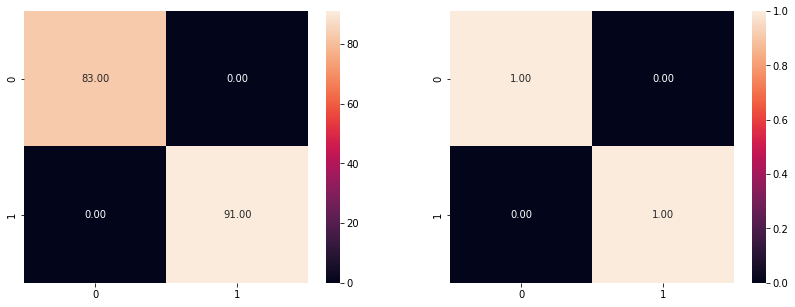

In [ ]:
y_pred_Per = modeloPer.predict(x_train)
matriz_confusion(y_train,y_pred_Per)

In [ ]:
print(y_pred_Per)
print(y_train)

[1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]
125    1
130    1
199    0
113    1
242    0
      ..
206    0
105    1
157    0
144    0
84     1
Name: Clase, Length: 174, dtype: int64


Datos de validacion

Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.98      0.99        51

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.98        75
weighted avg       0.99      0.99      0.99        75



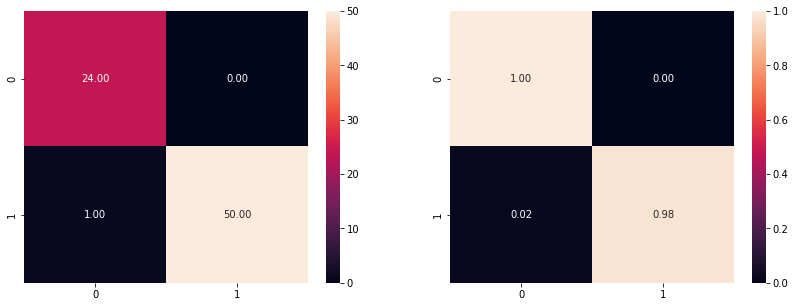

In [ ]:
y_pred_PerV = modeloPer.predict(x_test)
matriz_confusion(y_test,y_pred_PerV)

In [ ]:
print(y_pred_PerV)
print(y_test)

[0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 1]
209    0
133    1
203    0
126    1
19     1
      ..
173    0
235    0
120    1
30     1
65     1
Name: Clase, Length: 75, dtype: int64


##CLASIFICACION POR REGRESION LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression(max_iter=2000,random_state=10)
clf_log.fit(x_train, y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Datos de entrenamiento

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        91

    accuracy                           1.00       174
   macro avg       1.00      1.00      1.00       174
weighted avg       1.00      1.00      1.00       174



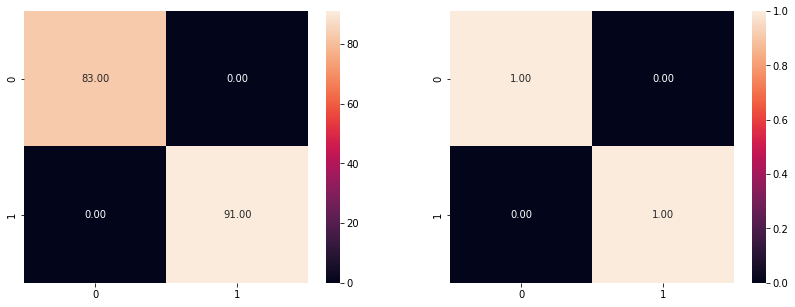

In [ ]:
y_pred_logT = clf_log.predict(x_train)
matriz_confusion(y_train,y_pred_logT)

In [ ]:
print(y_pred_logT)
print(y_train)

[1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]
125    1
130    1
199    0
113    1
242    0
      ..
206    0
105    1
157    0
144    0
84     1
Name: Clase, Length: 174, dtype: int64


Datos de validacion

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.98      1.00      0.99        51

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



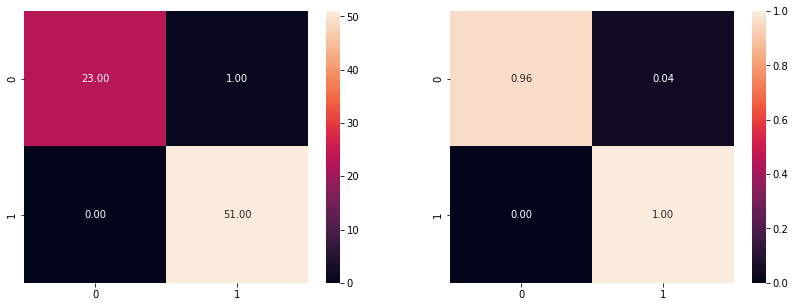

In [ ]:
y_pred_logV = clf_log.predict(x_test)
matriz_confusion(y_test,y_pred_logV)

In [ ]:
print(y_pred_logV)
print(y_test)

[0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 1]
209    0
133    1
203    0
126    1
19     1
      ..
173    0
235    0
120    1
30     1
65     1
Name: Clase, Length: 75, dtype: int64


##CLASIFICACION POR NAIVE BAYES

**Clasificador basado en naive bayes**

Los modelos de Naive Bayes son una clase especial de algoritmos de clasificación de Aprendizaje Automatico, o Machine Learning que se basan en una técnica de clasificación estadística llamada “teorema de Bayes”.

Estos modelos son llamados algoritmos “Naive”, o “Inocentes” en español. En ellos se asume que las variables predictoras son independientes entre sí. En otras palabras, que la presencia de una cierta característica en un conjunto de datos no está en absoluto relacionada con la presencia de cualquier otra característica [1].

El clasificador Naive Bayes asume que el efecto de una característica particular en una clase es independiente de otras características. Por ejemplo, un solicitante de préstamo es deseable o no dependiendo de sus ingresos, historial de préstamos y transacciones anteriores, edad y ubicación. Incluso si estas características son interdependientes, estas características se consideran de forma independiente. Esta suposición simplifica la computación, y por eso se considera ingenua. Esta suposición se denomina independencia condicional de clase [2].

La formula del teorema de Bayes es la siguiente:

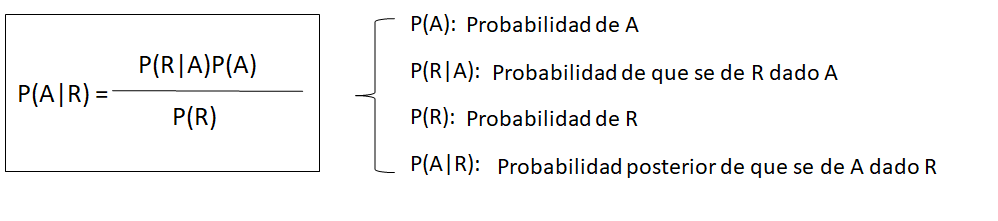

En caso de que se tenga una sola característica, el clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

Paso 1: calcular la probabilidad previa para las etiquetas de clase dadas.

Paso 2: determinar la probabilidad de probabilidad con cada atributo para cada clase.

Paso 3: poner estos valores en el teorema de Bayes y calcular la probabilidad posterior.

Paso 4: ver qué clase tiene una probabilidad más alta, dado que la variable de entrada pertenece a la clase de probabilidad más alta.[2]

In [ ]:
from sklearn.naive_bayes import GaussianNB
modeloNB = GaussianNB(var_smoothing=5e-5)
modeloNB.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=5e-05)

Datos de entrenamiento

Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        83
           1       0.96      1.00      0.98        91

    accuracy                           0.98       174
   macro avg       0.98      0.98      0.98       174
weighted avg       0.98      0.98      0.98       174



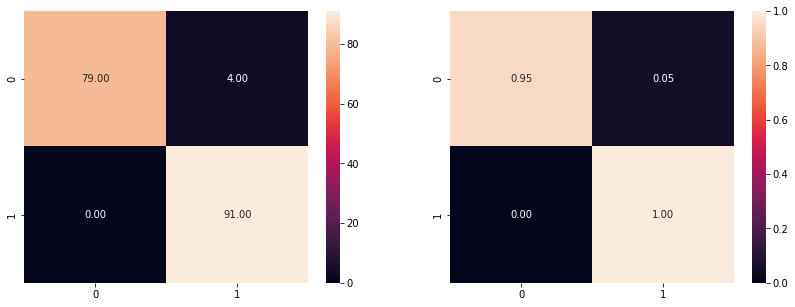

In [ ]:
y_pred_NBT=modeloNB.predict(x_train)
matriz_confusion(y_train,y_pred_NBT)

In [ ]:
print(y_pred_NBT)
print(y_train)

[1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1
 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1]
125    1
130    1
199    0
113    1
242    0
      ..
206    0
105    1
157    0
144    0
84     1
Name: Clase, Length: 174, dtype: int64


-----------------------------------------
Datos de validacion

Accuracy: 0.99
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        24
           1       0.98      1.00      0.99        51

    accuracy                           0.99        75
   macro avg       0.99      0.98      0.98        75
weighted avg       0.99      0.99      0.99        75



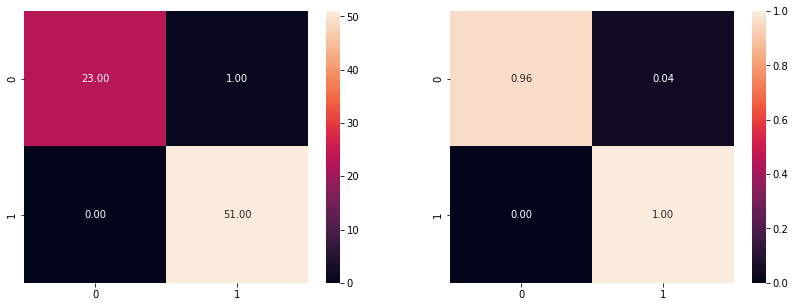

In [ ]:
y_pred_NBV=modeloNB.predict(x_test)
matriz_confusion(y_test,y_pred_NBV)

In [ ]:
print(y_pred_NBV)
print(y_test)

[0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 1]
209    0
133    1
203    0
126    1
19     1
      ..
173    0
235    0
120    1
30     1
65     1
Name: Clase, Length: 75, dtype: int64


**REFERENCIAS**

[1]Roman. V. "Algoritmos naive bayes:Fundamentos e implementacion". 2019, en linea. Disponible en: https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

[2]Sin nombre. "naive bayes teoria". en linea. Disponible en: https://aprendeia.com/naive-bayes-teoria-machine-learning/